# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [18]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime, endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 50.0]
st = load_wfs_obj.read_waveform_data()

In [21]:
# Add noise to data:
for i in range(len(st)):
    st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

<IPython.core.display.Javascript object>


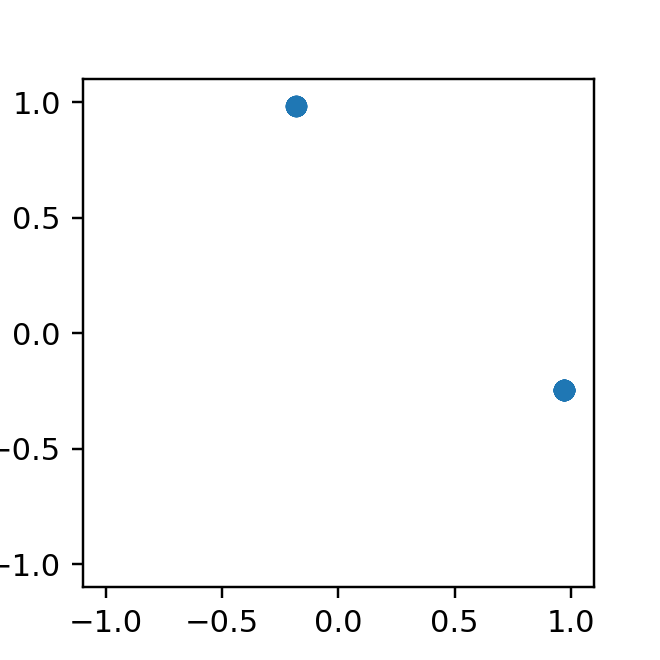

47.0 0.046 1.75 0.01525


In [47]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.2 #0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.4 #0.2
splitting_event.rotate_step_deg = 1.0 #2.5
splitting_event.max_t_shift_s = 0.12
splitting_event.n_win = 5 #5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis()

In [39]:
A = np.arange(10)
B = np.array([1.,0.,2.,2,3,5,7,12,14,17])
C = np.vstack((A,B))
C.shape

np.maximum(A,B)

array([  1.,   1.,   2.,   3.,   4.,   5.,   7.,  12.,  14.,  17.])

In [ ]:
X.shape

In [ ]:
a = np.arange(6)
b = np.arange(6)
Y = np.dstack((a,b))[0,:,:]
Y.shape